In [25]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
sns.set(style='whitegrid', font_scale=1.6, context='paper')

In [3]:
def json_load(s):
    with open(s,'r') as f:
        return json.load(f)
    

# none = json_load('../datamap/none/none.json')
none = pd.read_json('../datamap/none/none.json')

In [4]:
none.keys()

Index(['fnames', 'gold_prob_means', 'gold_prob_stds', 'correct_means'], dtype='object')

<Axes: xlabel='gold_prob_stds', ylabel='gold_prob_means'>

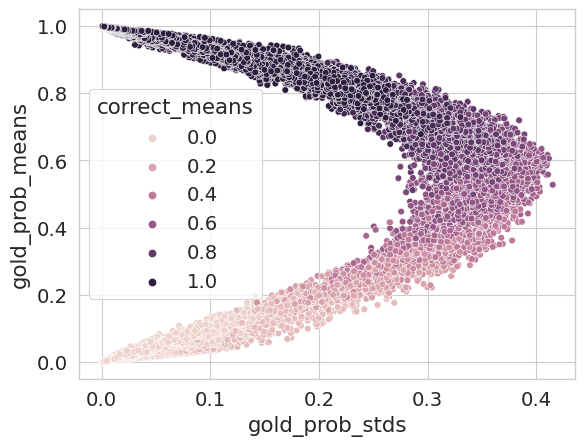

In [5]:
sns.scatterplot(none, y='gold_prob_means', x='gold_prob_stds', hue='correct_means')

In [7]:
aa = pd.read_json('../datamap/auto_augment/auto_augment.json')

In [8]:
assert (none['fnames'] == aa['fnames']).all()

In [9]:
plot_data = pd.DataFrame()
plot_data['diff_conf'] =  (aa['gold_prob_means'] - none['gold_prob_means'])
plot_data['diff_var'] = (aa['gold_prob_stds'] - none['gold_prob_stds'])
plot_data['org_conf'] =  none['gold_prob_means']
plot_data['org_var'] = none['gold_prob_stds']

<Axes: xlabel='diff_var', ylabel='diff_conf'>

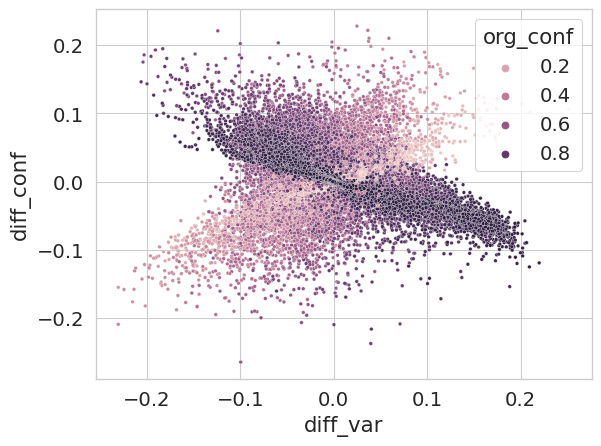

In [10]:
sns.scatterplot(data=plot_data, y='diff_conf', x='diff_var', hue='org_conf', s=7)

<Axes: xlabel='diff_var', ylabel='diff_conf'>

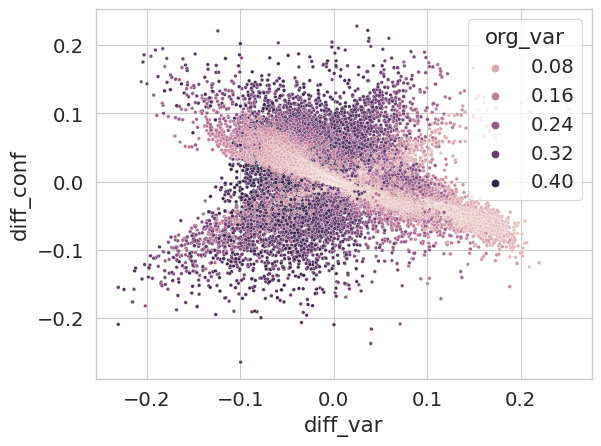

In [11]:
sns.scatterplot(data=plot_data, y='diff_conf', x='diff_var', hue='org_var', s=7)

# Generate plot for all augmentations

In [12]:
DATAMAPS = "../datamap/"
augs = os.listdir(DATAMAPS)
augs.remove('none')
augs_dir = [os.path.join(DATAMAPS, f) for f in augs]

In [34]:
i=0
for aug, d in zip(augs, augs_dir):
    if not os.path.isdir(d):
        continue
    json = os.path.join(d, f"{aug}.json")
    data = pd.read_json(json)
    plot_data = pd.DataFrame()
    plot_data['diff_conf'] =  data['gold_prob_means'] - none['gold_prob_means']
    plot_data['diff_var'] = data['gold_prob_stds'] - none['gold_prob_stds']
    plot_data['org_conf'] =  none['gold_prob_means']
    plot_data['org_var'] = none['gold_prob_stds']
#     print(plot_data)
    plot = sns.scatterplot(data=plot_data, y='diff_conf', x='diff_var', hue='org_conf', s=7, legend='brief')
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    fig = plot.get_figure()
    fig.savefig(os.path.join(d, f"{aug}_diff_conf.jpg"), bbox_inches='tight')
    fig.clf()
    
    plot = sns.scatterplot(data=plot_data, y='diff_conf', x='diff_var', hue='org_var', s=7, legend='brief')
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    fig = plot.get_figure()
    fig.savefig(os.path.join(d, f"{aug}_diff_var.jpg"), bbox_inches='tight')
    fig.clf()
    print(aug)

cutout
translate_fill_x
auto_augment
shear
sharpness
posterize
invert
color_jitter
random_rotation
solarize
equalize
gaussian_blur
horizontal_flip
auto_contrast


<Figure size 640x480 with 0 Axes>

In [29]:
fig

<Figure size 640x480 with 0 Axes>